<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
library(tidyverse)
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
flights %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


#filter()

In [5]:
flights %>% filter(month == 1 & day == 1 & dest %in% c('ORD','LAS')) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,608,600,8,807,735,32,MQ,3768,N9EAMQ,EWR,ORD,139,719,6,0,2013-01-01 06:00:00
2013,1,1,629,630,-1,824,810,14,AA,303,N3CYAA,LGA,ORD,140,733,6,30,2013-01-01 06:00:00
2013,1,1,651,655,-4,936,942,-6,B6,203,N558JB,JFK,LAS,323,2248,6,55,2013-01-01 06:00:00


#arrange()

In [6]:
arrange(flights, desc(dep_delay)) %>% head()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


#select()

In [7]:
select(flights, contains("arr")) %>% head()

arr_time,sched_arr_time,arr_delay,carrier
<int>,<int>,<dbl>,<chr>
830,819,11,UA
850,830,20,UA
923,850,33,AA
1004,1022,-18,B6
812,837,-25,DL
740,728,12,UA


#mutate()

In [14]:
flights %>% 
    select(year:day, ends_with("delay"), distance, air_time) %>% 
    mutate(gain = dep_delay - arr_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours) %>% head()

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,-9,3.783333,-2.378855
2013,1,1,4,20,1416,227,-16,3.783333,-4.229075
2013,1,1,2,33,1089,160,-31,2.666667,-11.625000
2013,1,1,-1,-18,1576,183,17,3.050000,5.573770
2013,1,1,-6,-25,762,116,19,1.933333,9.827586
2013,1,1,-4,12,719,150,-16,2.500000,-6.400000


#summarize()

In [20]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% head()

dest,count,dist,delay
<chr>,<int>,<dbl>,<dbl>
ABQ,254,1826.0000,4.381890
ACK,265,199.0000,4.852273
ALB,439,143.0000,14.397129
ATL,17215,757.1082,11.300113
AUS,2439,1514.2530,6.019909
AVL,275,583.5818,8.003831


#ggplot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



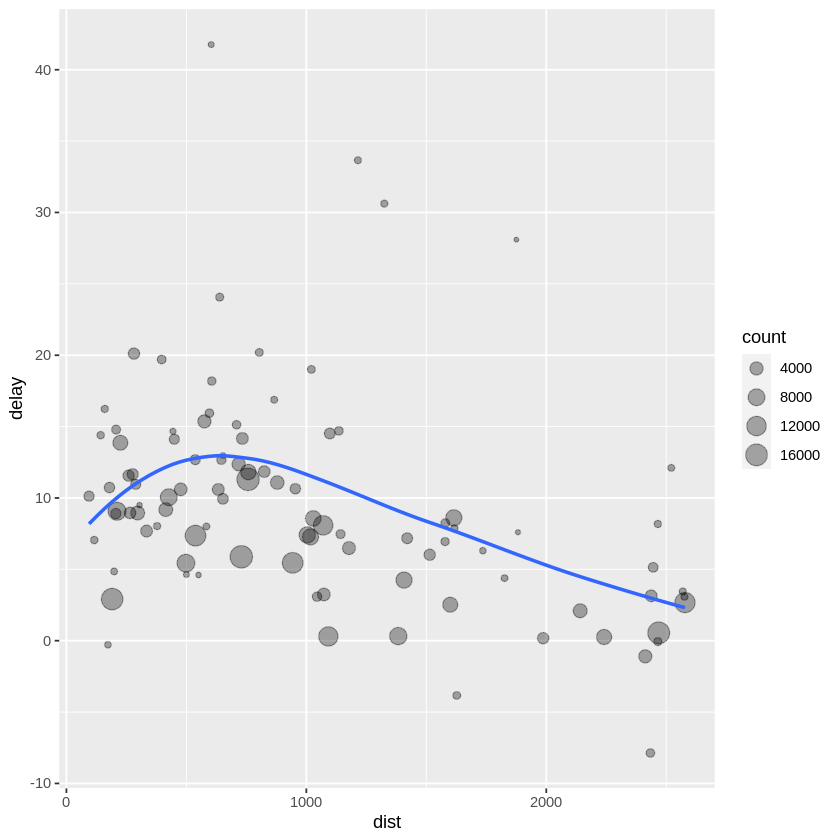

In [19]:
flights %>% group_by(dest) %>% 
   summarise(count = n(), dist = mean(distance, na.rm = TRUE), delay = mean(arr_delay, na.rm = TRUE) ) %>%
   filter(count > 20, dest != "HNL") %>% 
ggplot(mapping = aes(x = dist, y = delay)) +
  geom_point(aes(size = count), alpha = 1/3) +
  geom_smooth(se = FALSE)